In [34]:
import pandas as pd
import numpy as np
import seaborn as sns


Retrieving the training data from other file

In [35]:
df= pd.read_csv("train_data.csv")
df.head()

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,A Yellow,H Red,A Red,Display_Order,League,Goal Difference,Home Win Ratio,Fouls Differential,Yellow Cards Differential,Red Cards Differential
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,3,0.0,1.0,3.0,...,2.0,0.0,0.0,20250116,Premier League,-2,-2,-1.0,0.0,0.0
1,16/01/2025,2024/25,Man United,Southampton,3,1,1,0.0,1.0,3.0,...,3.0,0.0,0.0,20250116,Premier League,2,2,-3.0,-2.0,0.0
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,3,0.0,0.0,2.0,...,1.0,0.0,0.0,20250115,Premier League,-1,-1,7.0,1.0,0.0
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,3,0.0,0.0,2.0,...,0.0,0.0,0.0,20250115,Premier League,-2,-2,1.0,0.0,0.0
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,1,1.0,0.0,1.0,...,2.0,0.0,0.0,20250115,Premier League,3,3,-3.0,-2.0,0.0


Performing 3 way split

In [36]:
from sklearn.model_selection import train_test_split

X = df[['Goal Difference', 'Home Win Ratio', 'Fouls Differential', 'Yellow Cards Differential', 'Red Cards Differential']]
y = df['FT Result']  

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


Loading the model from.pkl file

In [37]:
import joblib
model = joblib.load('epl_match_prediction_model.pkl')

make prediction

In [42]:
y_pred = model.predict(X_val)

c:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Exporting to database

In [39]:
from sqlalchemy import create_engine

host = r'127.0.0.1' 
db = r'MSDS610' 
user = r'postgres' 
pw = r'smooth' 
port = r'5432'
schema = r'raw'

db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [40]:
table_name = r'EPL Data '
schema = r'analytics' 

df.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

9329

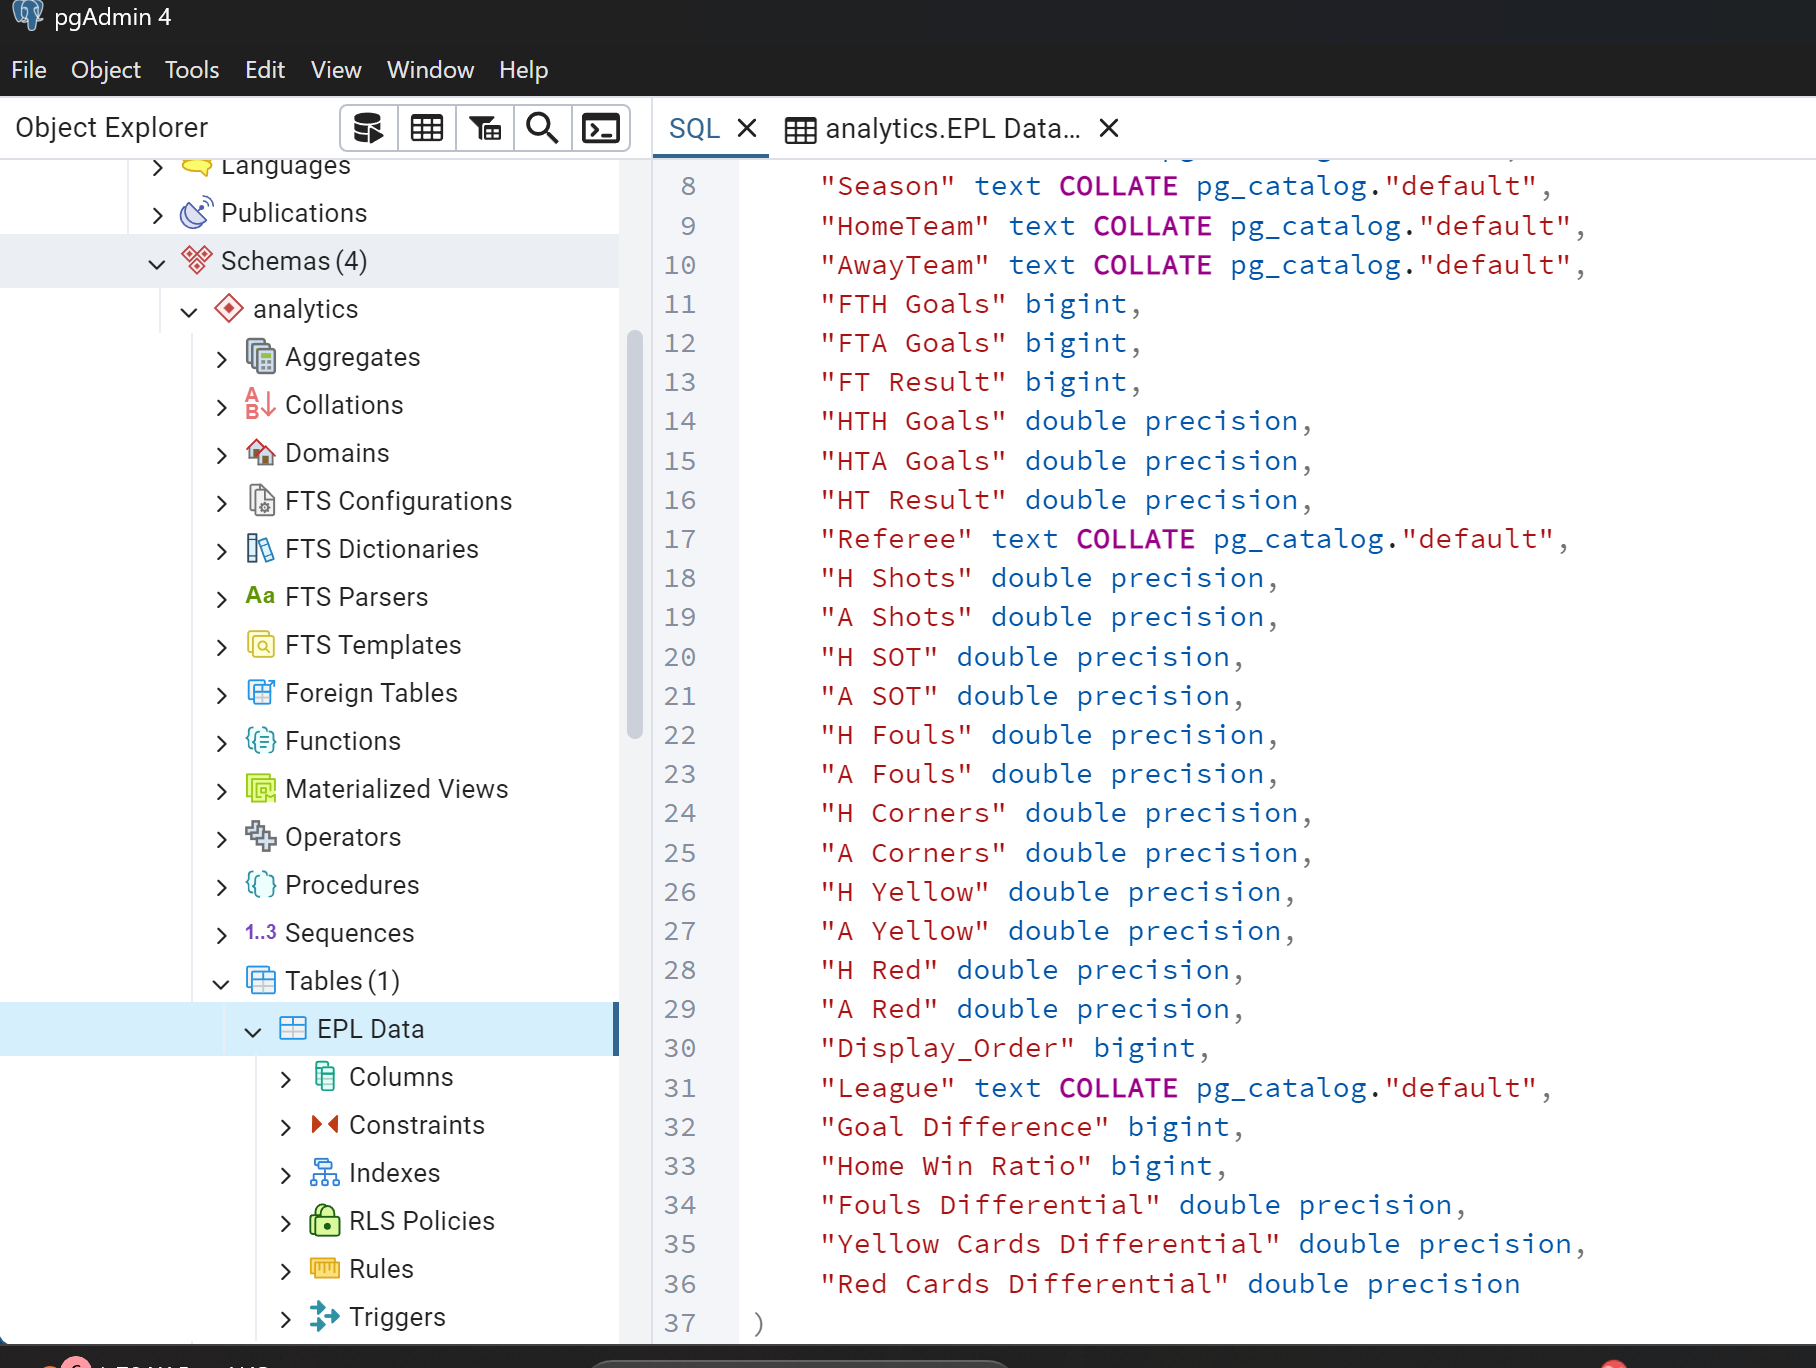

To build this model, we engineered these features from the raw data and performed a train-test split, ensuring the model was validated against unseen data (the validation set). After applying a RandomForestClassifier model, we evaluated its performance by generating predictions for the validation set.

In this analysis, we developed a predictive model to forecast match outcomes in the English Premier League (EPL) based on historical match data, including key features such as Goal Difference, Home Win Ratio, Fouls Differential, Yellow Cards Differential, and Red Cards Differential.

The model showed promise with the given features, and further iteration, feature engineering, or the use of different machine learning models could potentially improve its predictive accuracy. The next steps could include refining the model, experimenting with other feature sets, and incorporating additional data sources, such as player statistics or team dynamics, to improve predictions.

Finally, the predictions from the validation set were successfully stored in the PostgreSQL database, where further analysis and decision-making can take place based on these insights.